In [1]:
! pip install kagglehub

In [4]:
!pip install pip install opencv-python

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityamahimkar/iqothnccd-lung-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/alexmak/.cache/kagglehub/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/versions/2


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
# import cv2
import random
import os

In [7]:
# directory = '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
# directory = '/Data/Training_Cases'
directory='/Users/alexmak/Desktop/CMPUT/School/Year_6/RADDI_514/Project/Lung_Tumor_Detection_Project/Data/Training_Cases'

categories = ['Benign_Cases', 'Malignant_Cases', 'Normal_Cases']

In [8]:
# # img_classes = ["Bengin cases", "Malignant cases", "Normal cases"]
# img_classes = ['Benign_Cases', 'Malignant_Cases', 'Normal_Cases']
# path_list = [directory, directory, directory]

# img_path = []
# class_labels = []
# for i, dir_list in enumerate(path_list):
#     name_img = os.listdir(dir_list)
#     for name_file in name_img:
#         img = os.path.join(dir_list,name_file)
#         img_path.append(img)
#         class_labels.append(img_classes[i])

# df = pd.DataFrame({"img_path" : img_path,
#                   "label" : class_labels})

# df.head()

## Image Size Variations

In [10]:
import imageio
size_data = {}
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(filepath)
        # imageio.v2.imread
        height, width, channels = imageio.v2.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
    
    size_data[i] = temp_dict
        
size_data

/Users/alexmak/Desktop/CMPUT/School/Year_6/RADDI_514/Project/Lung_Tumor_Detection_Project/Data/Training_Cases/Benign_Cases/Bengin case (85).jpg
/Users/alexmak/Desktop/CMPUT/School/Year_6/RADDI_514/Project/Lung_Tumor_Detection_Project/Data/Training_Cases/Benign_Cases/Bengin case (109).jpg
/Users/alexmak/Desktop/CMPUT/School/Year_6/RADDI_514/Project/Lung_Tumor_Detection_Project/Data/Training_Cases/Benign_Cases/Bengin case (93).jpg
/Users/alexmak/Desktop/CMPUT/School/Year_6/RADDI_514/Project/Lung_Tumor_Detection_Project/Data/Training_Cases/Benign_Cases/Bengin case (50).jpg
/Users/alexmak/Desktop/CMPUT/School/Year_6/RADDI_514/Project/Lung_Tumor_Detection_Project/Data/Training_Cases/Benign_Cases/Bengin case (11).jpg
/Users/alexmak/Desktop/CMPUT/School/Year_6/RADDI_514/Project/Lung_Tumor_Detection_Project/Data/Training_Cases/Benign_Cases/Bengin case (46).jpg
/Users/alexmak/Desktop/CMPUT/School/Year_6/RADDI_514/Project/Lung_Tumor_Detection_Project/Data/Training_Cases/Benign_Cases/Bengin case 

{'Benign_Cases': {'512 x 512': 120},
 'Malignant_Cases': {'512 x 623': 31,
  '512 x 512': 501,
  '512 x 801': 28,
  '404 x 511': 1},
 'Normal_Cases': {'512 x 512': 415, '331 x 506': 1}}

In [11]:
!pip install --upgrade pip setuptools wheel

In [12]:
!pip install opencv-python

Benign_Cases


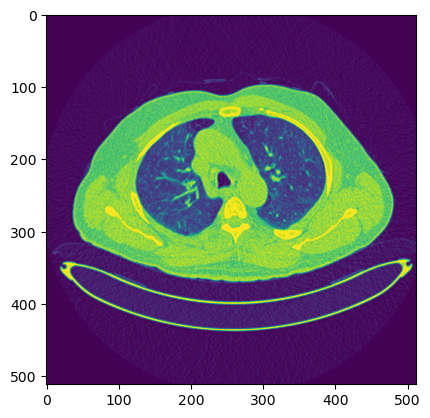

Malignant_Cases


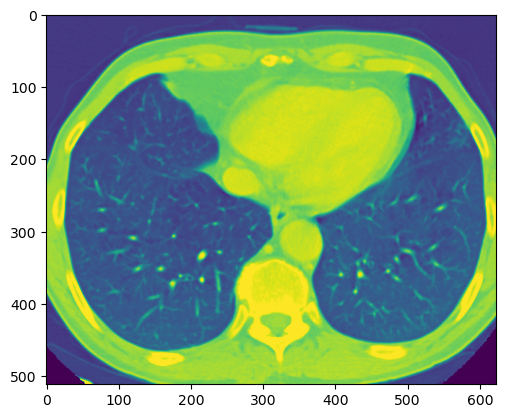

Normal_Cases


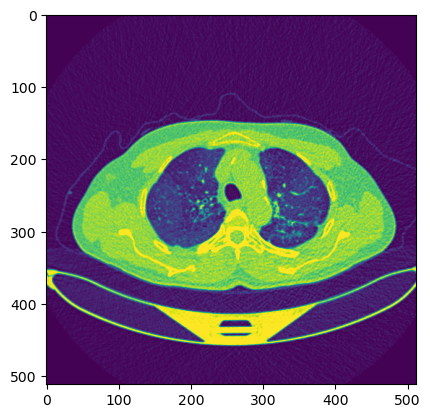

In [13]:
import cv2
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

In [14]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)


In [15]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [16]:
!pip install scikit-learn==1.2.2

## Import Packages¶

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

# import tensorflow as tf
# import tensorflow_addons as tfa
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
# from keras.applications import resnet
# from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
# from keras.applications.resnet import ResNet50
# from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [19]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 7.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 25.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 9.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.6/589.6 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0


In [20]:
!pip install keras

In [23]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 10.9 MB/s eta 0:00:00a 0:00:01


In [ ]:
import tensorflow as tf
# import tensorflow_addons as tfa
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
# from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

## image processing and testing

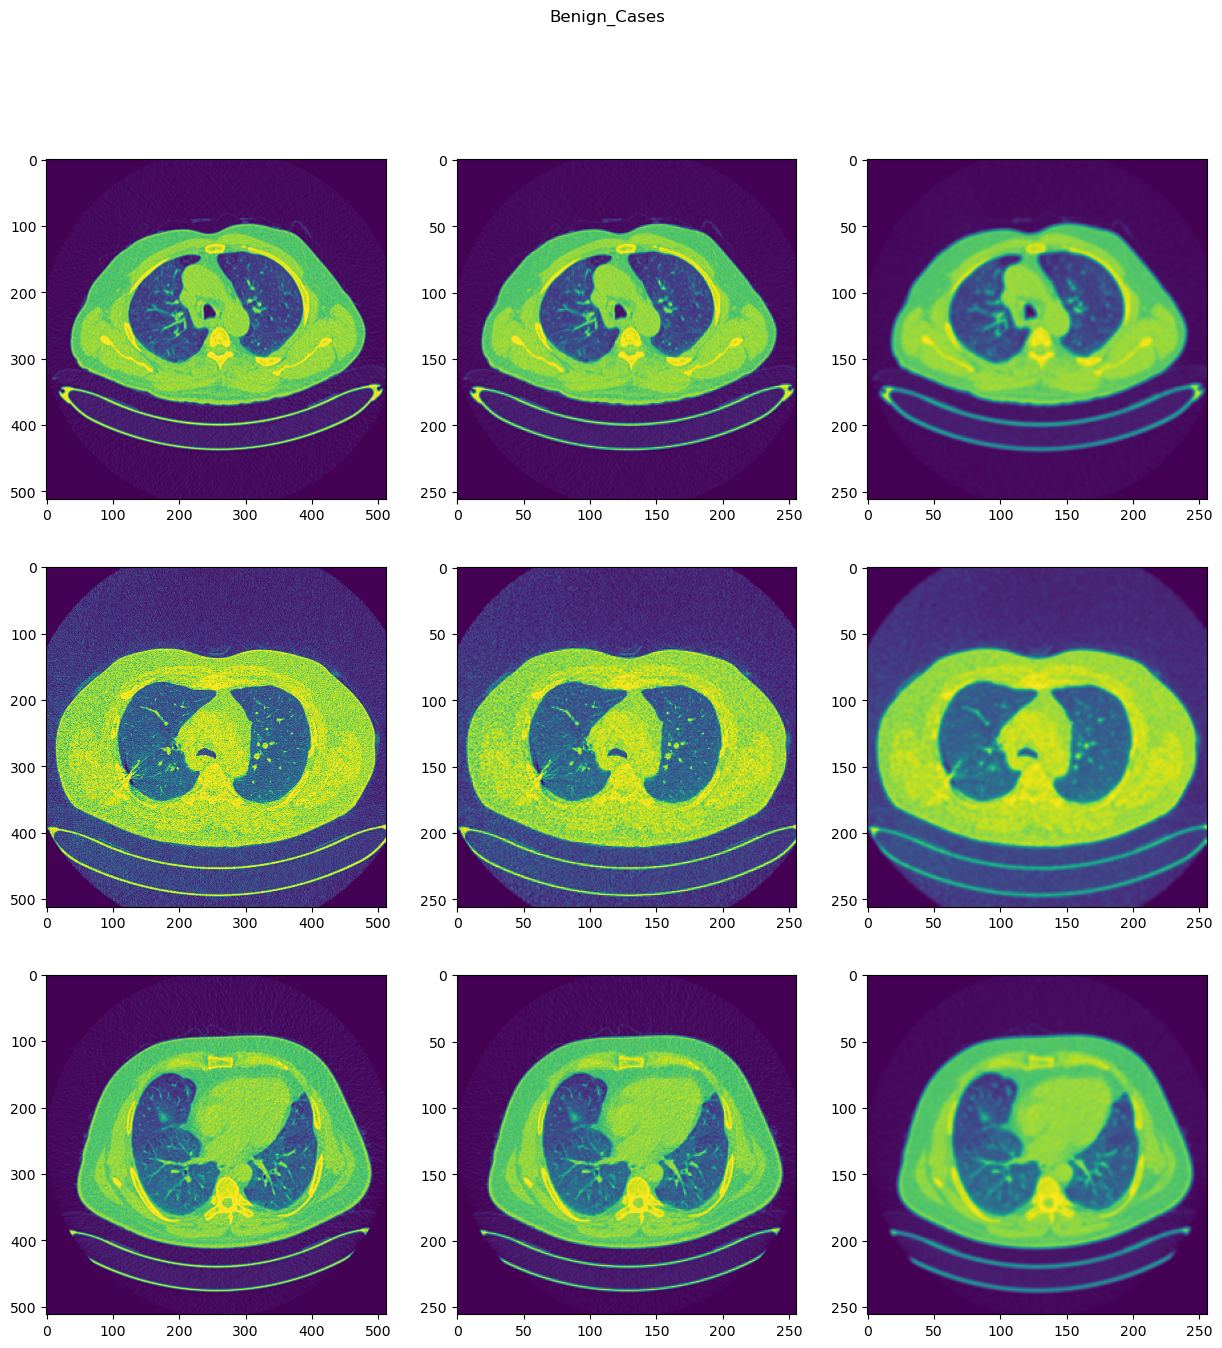

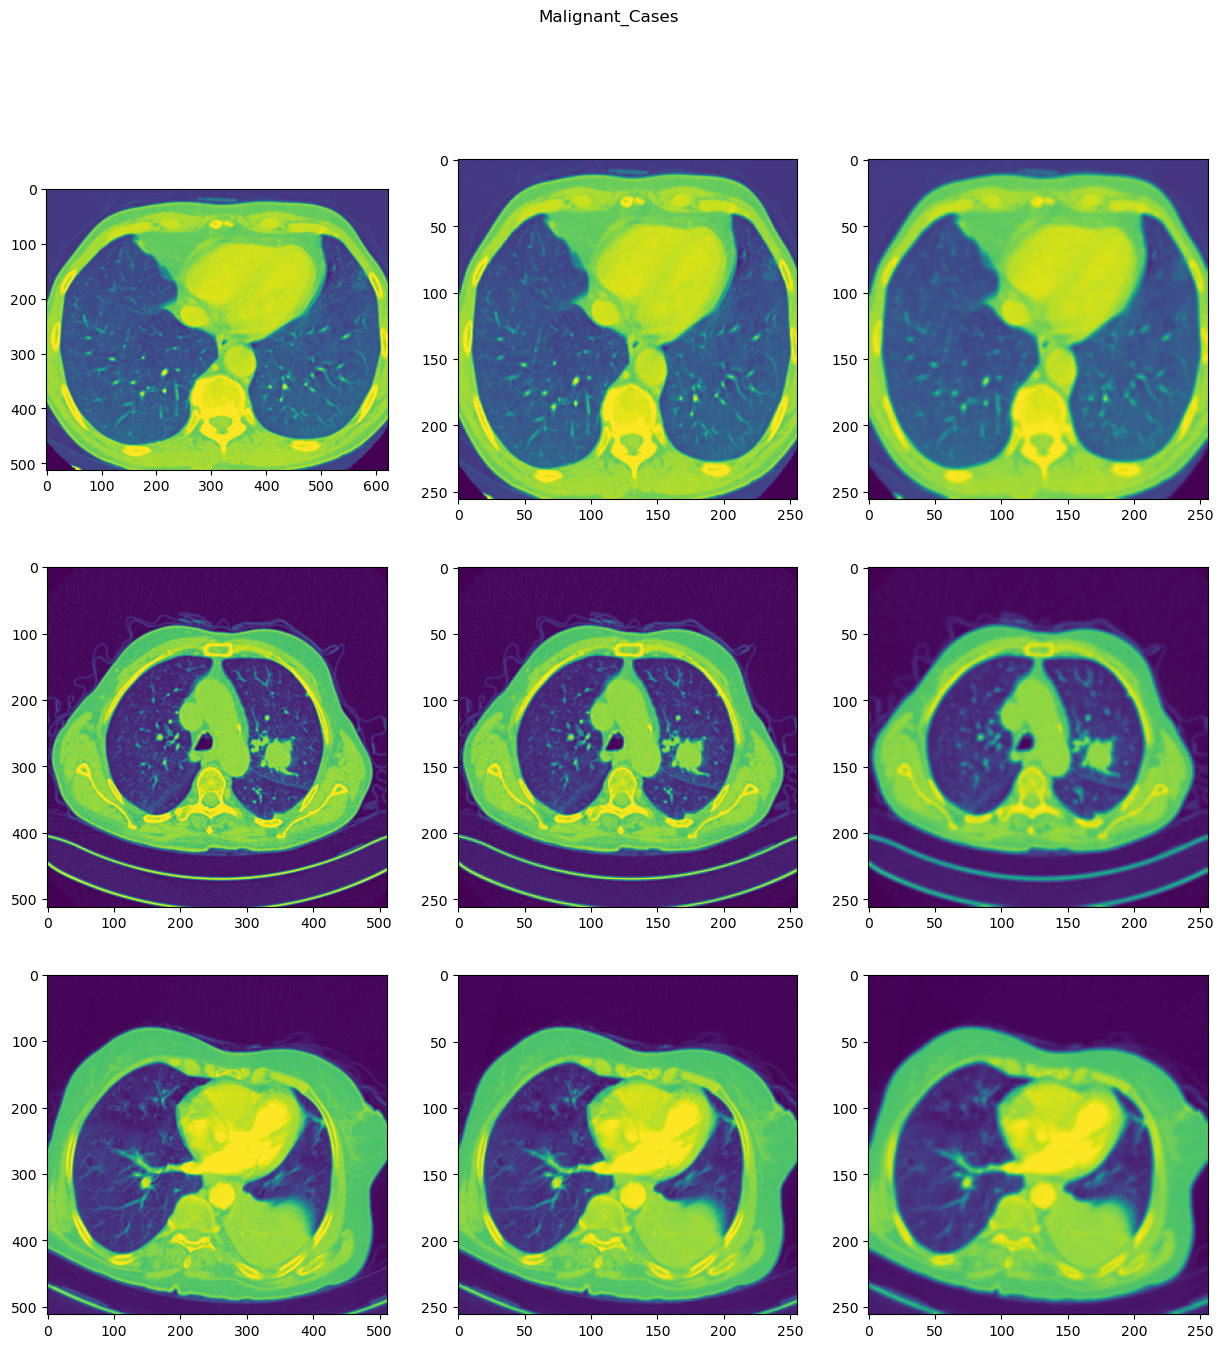

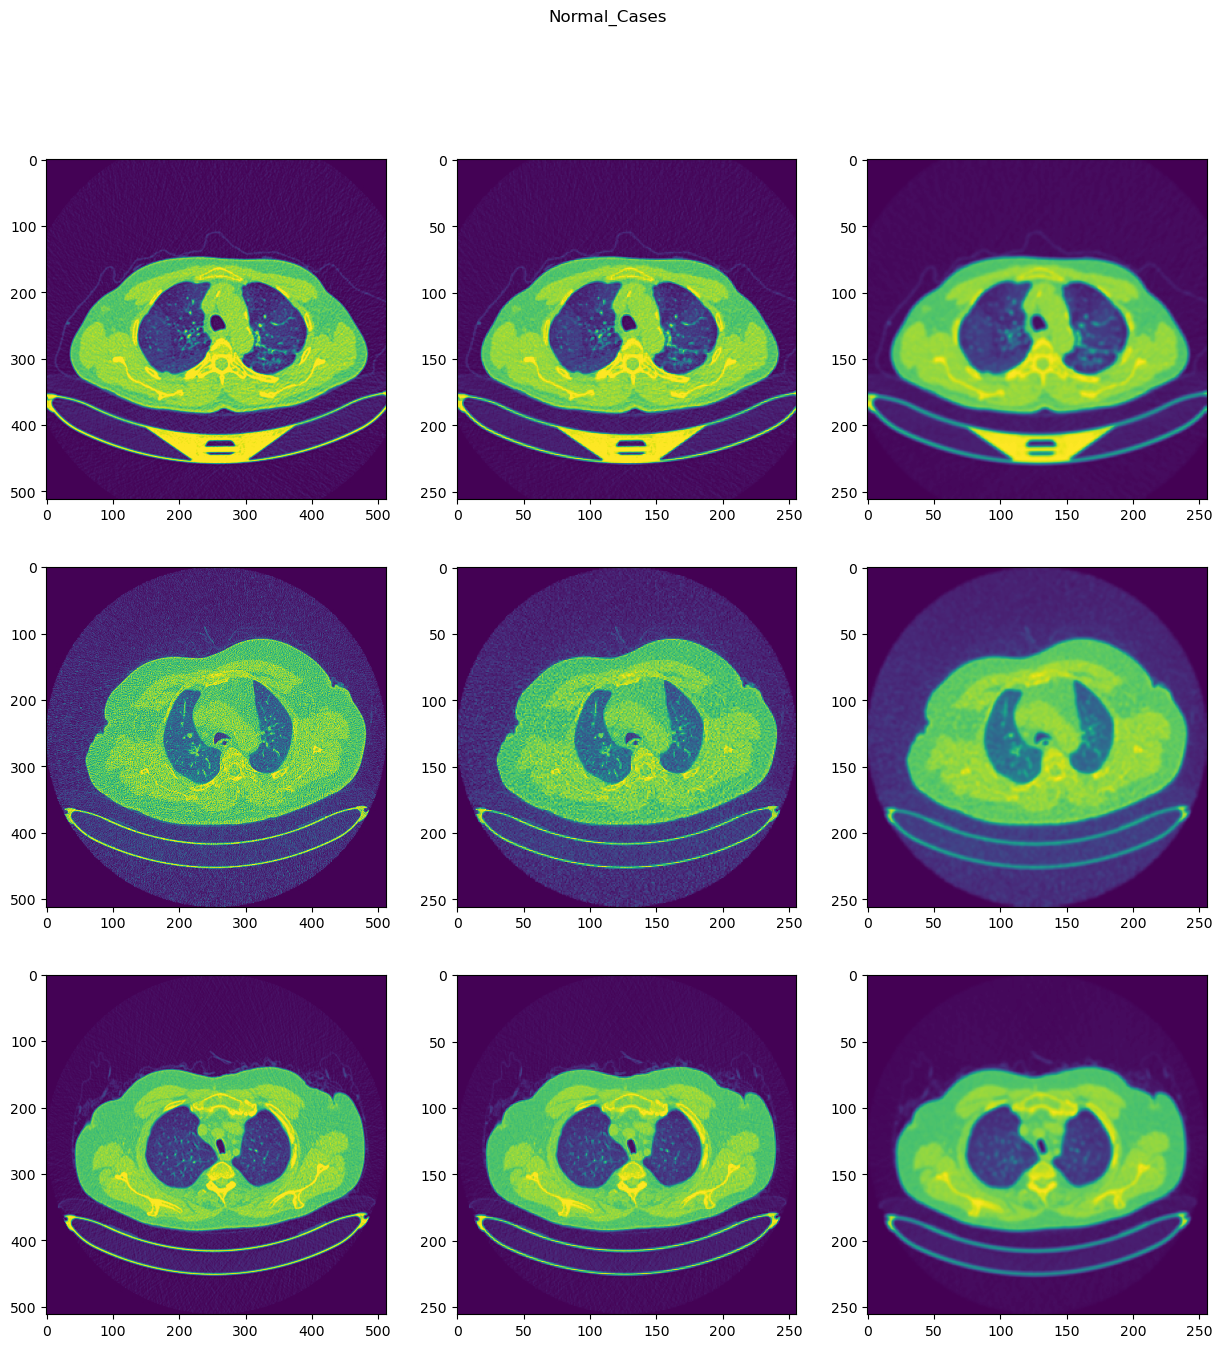

In [26]:
img_size = 256
for i in categories:
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)
    
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        
        img0 = cv2.resize(img, (img_size, img_size))
        
        img1 = cv2.GaussianBlur(img0, (5, 5), 0)
        
        ax[cnt, 0].imshow(img)
        ax[cnt, 1].imshow(img0)
        ax[cnt, 2].imshow(img1)
        cnt += 1
        if cnt == samples:
            break
        
plt.show()

## Preparing Data

In [27]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])
        
random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)
    
print('X length:', len(X))
print('y counts:', Counter(y))

# normalize
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)

X length: 1097
y counts: Counter({1: 561, 2: 416, 0: 120})


In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

822 (822, 256, 256, 1)
275 (275, 256, 256, 1)


## Applying SMOTE to oversample the data

In [29]:
print(Counter(y_train), Counter(y_valid))

Counter({1: 420, 2: 312, 0: 90}) Counter({1: 141, 2: 104, 0: 30})


In [30]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

822 (822, 256, 256, 1)
822 (822, 65536)


In [31]:
print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({1: 420, 2: 312, 0: 90})
After SMOTE: Counter({2: 420, 1: 420, 0: 420})


In [32]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

822 (822, 256, 256, 1)
1260 (1260, 256, 256, 1)


## Model Building with SMOTE data

In [36]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(16))
model1.add(Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │     1,968,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,977,763 (7.54 MB)

 Trainable params: 1,977,763 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model1.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 53s 314ms/step - accuracy: 0.6426 - loss: 1.7228 - val_accuracy: 0.9818 - val_loss: 0.0838
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 98s 418ms/step - accuracy: 0.9952 - loss: 0.0256 - val_accuracy: 0.9818 - val_loss: 0.0408
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 71s 348ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9855 - val_loss: 0.0603
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 0.9936 - loss: 0.0352 - val_accuracy: 0.9491 - val_loss: 0.1377
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 49s 308ms/step - accuracy: 0.9992 - loss: 0.0128 - val_accuracy: 0.9709 - val_loss: 0.0713
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 49s 308ms/step - accuracy: 0.9955 - loss: 0.0245 - val_accuracy: 0.9891 - val_loss: 0.0411
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 50s 315ms/step - accuracy: 0.9989 - loss: 0.0056 - val_accuracy: 0.9855 - val_loss: 0.1006
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 46s 290ms/step - accuracy: 0.9959 - loss: 0

## Results

In [39]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 415ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       1.00      1.00      1.00       141
           2       0.99      1.00      1.00       104

    accuracy                           1.00       275
   macro avg       1.00      0.99      0.99       275
weighted avg       1.00      1.00      1.00       275

[[ 29   0   1]
 [  0 141   0]
 [  0   0 104]]


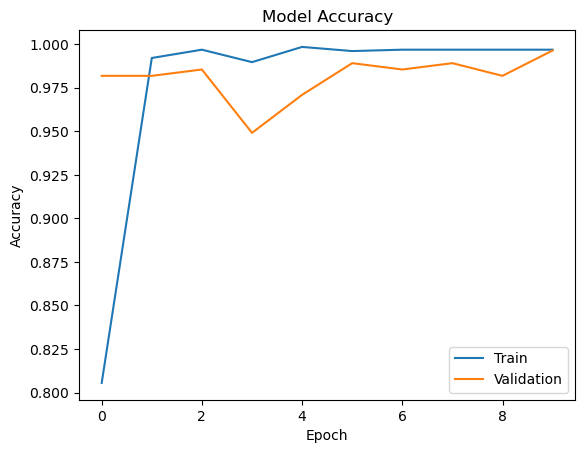

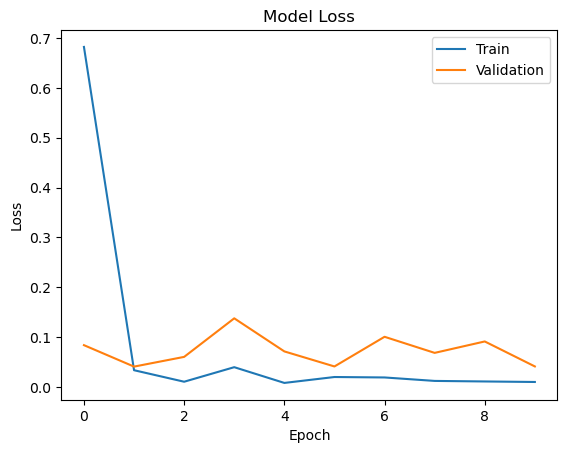

In [40]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Model Building with Class Weighted Approach

In [41]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(16))
model2.add(Dense(3, activation='softmax'))

model2.summary()

/Users/alexmak/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │     1,968,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,977,763 (7.54 MB)

 Trainable params: 1,977,763 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

# new_weights[0] = 0.5
# new_weights[1] = 20

new_weights

{0: 3.0444444444444443, 1: 0.6523809523809524, 2: 0.8782051282051282}

In [45]:
history = model2.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 316ms/step - accuracy: 0.9948 - loss: 0.0206 - val_accuracy: 0.9818 - val_loss: 0.0411
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 348ms/step - accuracy: 0.9982 - loss: 0.0079 - val_accuracy: 0.9818 - val_loss: 0.0715
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 336ms/step - accuracy: 0.9969 - loss: 0.0165 - val_accuracy: 0.9818 - val_loss: 0.1013
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.9977 - loss: 0.0155 - val_accuracy: 0.9927 - val_loss: 0.0388
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9818 - val_loss: 0.0567
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 312ms/step - accuracy: 0.9943 - loss: 0.0237 - val_accuracy: 0.9818 - val_loss: 0.0476
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 317ms/step - accuracy: 0.9997 - loss: 9.2416e-04 - val_accuracy: 0.9891 - val_loss: 0.0636
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step - accuracy: 1.0000 - los

## results for 2

In [46]:
y_pred = model2.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 411ms/step
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        30
           1       1.00      0.99      1.00       141
           2       1.00      0.92      0.96       104

    accuracy                           0.97       275
   macro avg       0.92      0.97      0.94       275
weighted avg       0.97      0.97      0.97       275

[[ 30   0   0]
 [  1 140   0]
 [  8   0  96]]


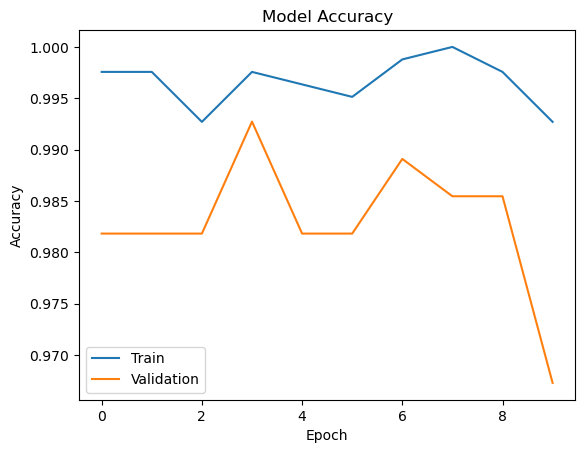

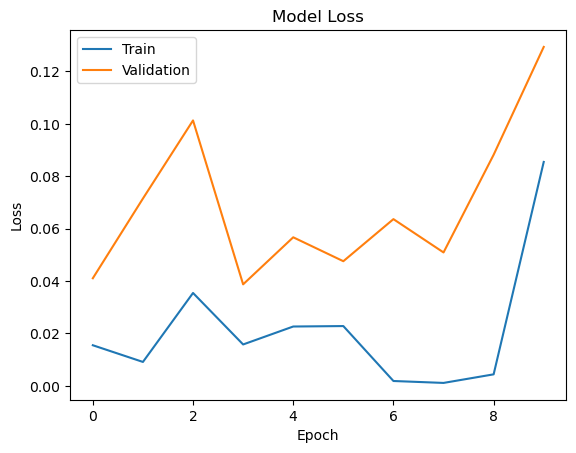

In [47]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [48]:
model2.save('lungmodel.keras')

## Data Augmentation

In [58]:
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True) 
val_datagen = ImageDataGenerator()

In [59]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=8) 
val_generator = val_datagen.flow(X_valid, y_valid, batch_size=8)

In [60]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(16))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │     1,968,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,977,763 (7.54 MB)

 Trainable params: 1,977,763 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# doesn't work with weights
history = model3.fit(train_generator, epochs=10, validation_data=val_generator), 

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 45s 423ms/step - accuracy: 0.5379 - loss: 1.5518 - val_accuracy: 0.7927 - val_loss: 0.5719
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 39s 376ms/step - accuracy: 0.8220 - loss: 0.4936 - val_accuracy: 0.8218 - val_loss: 0.5109
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 36s 352ms/step - accuracy: 0.9013 - loss: 0.2974 - val_accuracy: 0.9309 - val_loss: 0.2566
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 36s 345ms/step - accuracy: 0.9178 - loss: 0.2583 - val_accuracy: 0.9236 - val_loss: 0.2629
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 342ms/step - accuracy: 0.9567 - loss: 0.1454 - val_accuracy: 0.9600 - val_loss: 0.1083
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 34s 328ms/step - accuracy: 0.9681 - loss: 0.0984 - val_accuracy: 0.9673 - val_loss: 0.1008
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 36s 347ms/step - accuracy: 0.9689 - loss: 0.0903 - val_accuracy: 0.8873 - val_loss: 0.2707
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 312ms/step - accuracy: 0.9588 - loss: 0

In [64]:
y_pred = model3.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.99      1.00      1.00       141
           2       0.98      0.97      0.98       104

    accuracy                           0.98       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.98      0.98      0.98       275

[[ 28   0   2]
 [  0 141   0]
 [  2   1 101]]


Classification Accuracy: 0.9818181818181818

Confusion Matrix:
[[ 28   0   2]
 [  0 141   0]
 [  2   1 101]]

Sensitivities (Recall) for each class: [0.9333333333333333, 1.0, 0.9711538461538461]
Specificities for each class: [0.9918367346938776, 0.9925373134328358, 0.9883040935672515]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.99      1.00      1.00       141
           2       0.98      0.97      0.98       104

    accuracy                           0.98       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.98      0.98      0.98       275



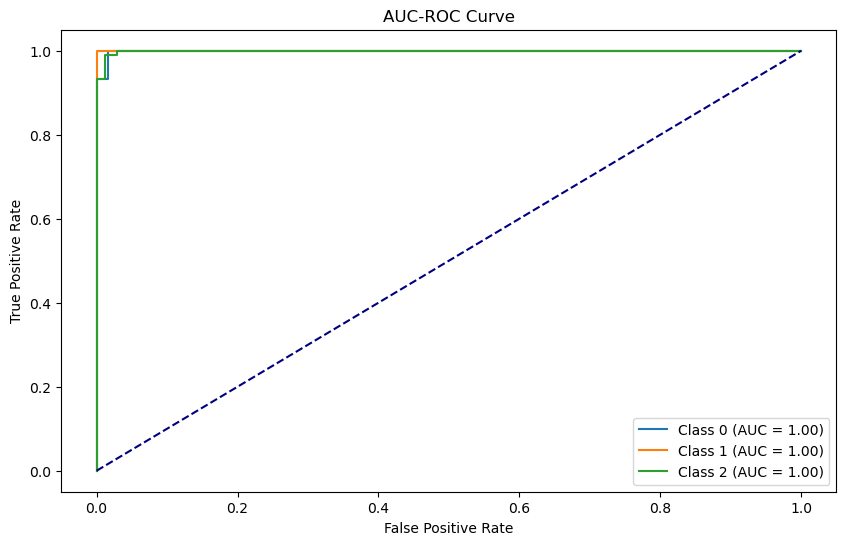

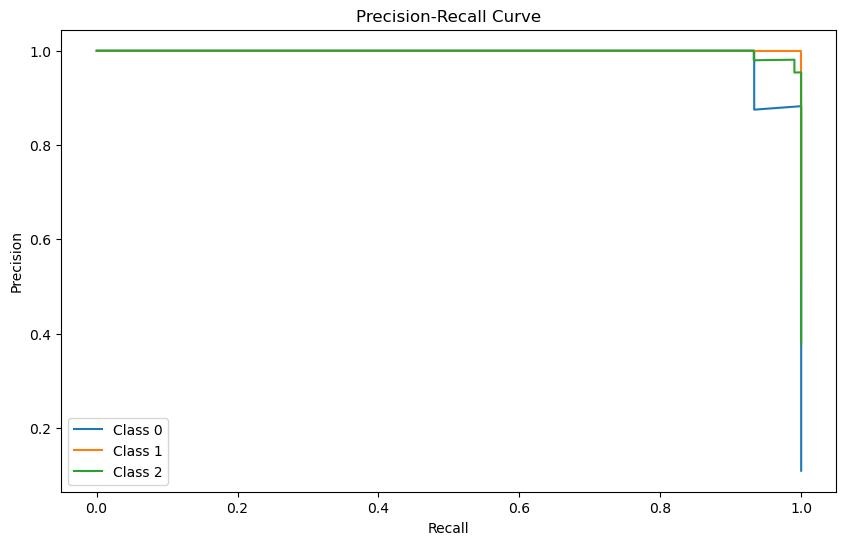

In [65]:
# other evaluation metrics

from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

# Classification Accuracy (already computed by classification report)
print("Classification Accuracy:", np.mean(y_pred_bool == y_valid))

# Sensitivity (Recall) and Specificity
conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred_bool)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate sensitivity and specificity for each class
num_classes = conf_matrix.shape[0]
sensitivities = []
specificities = []

for i in range(num_classes):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    sensitivities.append(sensitivity)
    specificities.append(specificity)

print("\nSensitivities (Recall) for each class:", sensitivities)
print("Specificities for each class:", specificities)

# Classification Report (already computed)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_bool))

# AUC-ROC Curve
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve((y_valid == i).astype(int), y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve((y_valid == i).astype(int), y_pred[:, i])
    plt.plot(recall, precision, label=f"Class {i}")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()


In [144]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(y_true, y_prob, class_names=['Class 0 (Benign Cases)', 'Class 1 (Malignant Cases)', 'Class 2 (Normal Cases)']):
    """
    Evaluates a classification model and plots various metrics.

    Parameters:
    - y_true: Array-like of shape (n_samples,) - True class labels
    - y_prob: Array-like of shape (n_samples, n_classes) - Predicted probabilities for each class
    - class_names: List of strings - Optional names of the classes

    Returns:
    - None (prints and plots evaluation results)
    """
    # Predicted labels
    y_pred = np.argmax(y_prob, axis=1)

    # Classification Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Classification Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Sensitivity (Recall) and Specificity
    num_classes = conf_matrix.shape[0]
    sensitivities = []
    specificities = []

    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FN = conf_matrix[i, :].sum() - TP
        FP = conf_matrix[:, i].sum() - TP
        TN = conf_matrix.sum() - (TP + FN + FP)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        sensitivities.append(sensitivity)
        specificities.append(specificity)

    print("\nSensitivities (Recall) for each class:", sensitivities)
    print("Specificities for each class:", specificities)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # AUC-ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i] if class_names else i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title("AUC-ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve((y_true == i).astype(int), y_prob[:, i])
        plt.plot(recall, precision, label=f"{class_names[i] if class_names else i}")

    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower left")
    plt.show()


Classification Accuracy: 0.9818

Confusion Matrix:
[[ 28   0   2]
 [  0 141   0]
 [  2   1 101]]

Sensitivities (Recall) for each class: [0.9333333333333333, 1.0, 0.9711538461538461]
Specificities for each class: [0.9918367346938776, 0.9925373134328358, 0.9883040935672515]

Classification Report:
                           precision    recall  f1-score   support

   Class 0 (Benign Cases)       0.93      0.93      0.93        30
Class 1 (Malignant Cases)       0.99      1.00      1.00       141
   Class 2 (Normal Cases)       0.98      0.97      0.98       104

                 accuracy                           0.98       275
                macro avg       0.97      0.97      0.97       275
             weighted avg       0.98      0.98      0.98       275



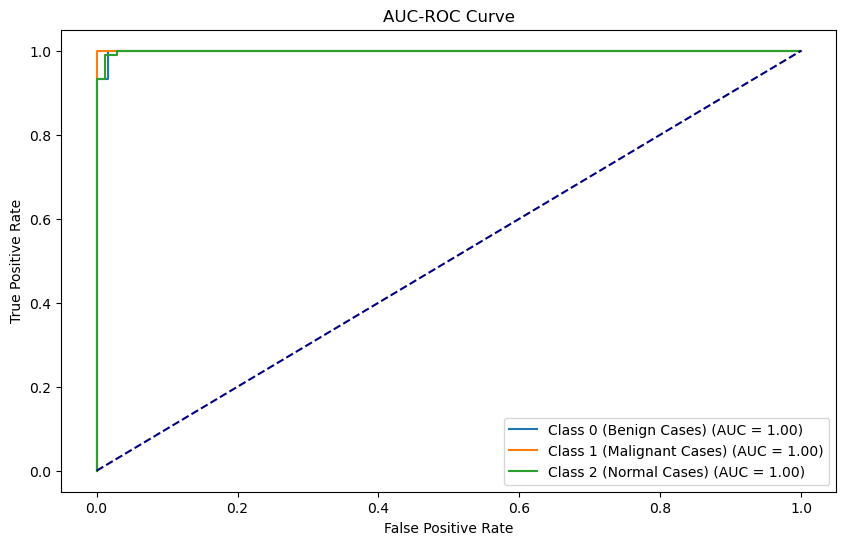

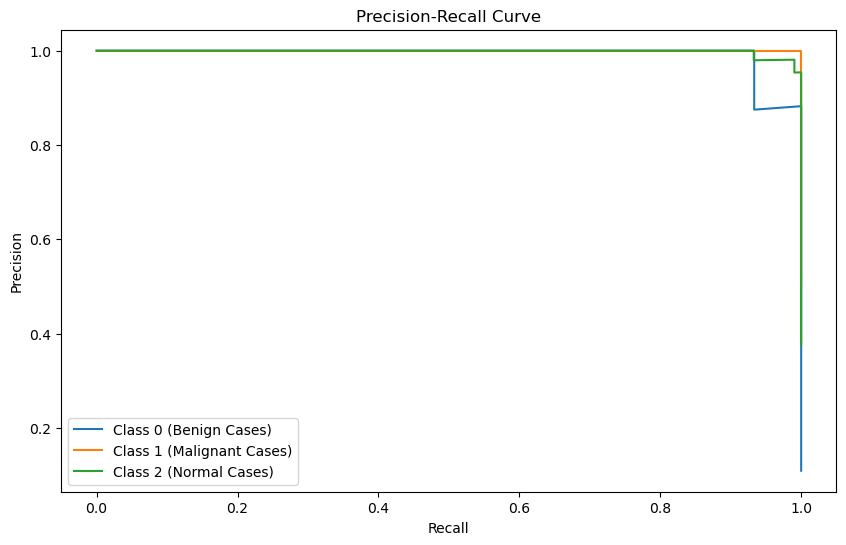

In [76]:
# Assuming y_valid and y_pred (from `model.predict`) are available
# class_names = ['Class A', 'Class B', 'Class C']  # Replace with actual class names if applicable
evaluate_model(y_valid, y_pred)


## K-fold grid search CV TEST

In [78]:
!pip install scikeras

# from scikeras.wrappers import KerasClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 12.2 MB/s eta 0:00:0000:010:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# from scikeras.wrappers import KerasClassifier

In [91]:
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Input

# Define a function to create the model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Input(shape=X_train.shape[1:]))  # Define the input shape explicitly
    model.add(Conv2D(16, (3, 3)))
    # model.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the model for compatibility with GridSearchCV
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid for optimizer
param_grid = {
    'optimizer': ['adam', SGD(learning_rate=0.01), RMSprop(learning_rate=0.01)],  # Try different optimizers
    'epochs': [5],                                                                        # Fixed number of epochs
    'batch_size': [8]                                                                      # Fixed batch size
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Run the grid search
grid_result = grid.fit(X_train_sampled, y_train_sampled, validation_data=(X_valid, y_valid))

# Display the best optimizer and corresponding score
print(f"Best optimizer: {grid_result.best_params_['optimizer']}")
print(f"Best validation accuracy: {grid_result.best_score_:.4f}")

# Evaluate the best model on the validation set
best_model = grid_result.best_estimator_.model
y_pred = best_model.predict(X_valid)
y_pred_bool = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_bool))


Best optimizer: <keras.src.optimizers.sgd.SGD object at 0x161033a90>
Best validation accuracy: 0.9833


AttributeError: 'function' object has no attribute 'predict'

In [98]:
print(grid_result.best_estimator_.model)

<function create_model at 0x163060fe0>


In [ ]:
best_model2 = grid_result.best_estimator_.model

# best_model2 = grid_result.best_estimator_.model

# Predict probabilities for the validation set
y_pred_proba = best_model2.predict_proba(X_valid)  # Probabilities for each class

# Predict class labels for the validation set
y_pred = best_model.predict(X_valid)

AttributeError: 'function' object has no attribute 'predict_proba'

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Input
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to create the model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Input(shape=X_train.shape[1:]))  # Define the input shape explicitly
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # Compile the model with the given optimizer
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the model for compatibility with GridSearchCV
model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid for optimizer
param_grid = {
    'optimizer': ['adam', SGD(learning_rate=0.1), RMSprop(learning_rate=0.1)],  # Try different optimizers
    'epochs': [5],                                                                        # Fixed number of epochs
    'batch_size': [8]                                                                      # Fixed batch size
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Run the grid search
grid_result = grid.fit(X_train_sampled, y_train_sampled, validation_data=(X_valid, y_valid))

# Display the best optimizer and corresponding score
print(f"Best optimizer: {grid_result.best_params_['optimizer']}")
print(f"Best validation accuracy: {grid_result.best_score_:.4f}")

# Access the best model
best_model = grid_result.best_estimator_  # Access the underlying Keras model

# Predict class probabilities for the validation set
y_pred_proba = best_model.predict(X_valid, verbose=1)  # Probabilities for each class

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_proba, axis=1)

# Evaluate predictions
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_pred))


Best optimizer: adam
Best validation accuracy: 0.9929


AxisError: axis 1 is out of bounds for array of dimension 1

In [134]:
print(best_model.predict(X_valid, verbose=1))

print(y_pred_proba)

print(best_model.predict(X_valid, verbose=1).shape)

print(y_pred_proba.shape)



35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
[1 0 1 2 1 2 2 2 2 1 1 1 1 1 1 2 2 2 2 1 0 2 1 2 2 2 1 2 2 1 2 2 1 1 1 1 1
 2 1 1 2 1 2 2 1 2 2 1 1 2 1 1 1 0 1 1 2 1 2 2 1 1 1 1 1 1 1 2 2 1 0 1 2 0
 2 1 2 1 1 2 0 2 2 2 2 1 1 2 2 1 0 1 1 1 2 1 2 2 0 2 1 0 1 2 2 2 2 2 1 2 0
 1 1 1 2 0 1 2 1 2 1 2 1 2 2 1 2 1 0 2 0 2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2
 1 2 1 0 1 0 2 1 1 2 1 1 0 1 2 2 2 0 1 2 1 1 2 1 2 1 1 2 0 0 1 1 1 0 1 2 1
 2 1 2 0 1 1 2 0 1 1 2 0 2 2 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 2 2 2 1 1 1 1 1 1 1 1 2 1 1 2 0 0 1 1 0 2 1 2 1 1 1 2 1 1 1 2 1 1 0 0 1 1
 2 2 2 2 2 2 1 0 2 1 1 2 2 1 1 2]
[1 0 1 2 1 2 2 2 2 1 1 1 1 1 1 2 2 2 2 1 0 2 1 2 2 2 1 2 2 1 2 2 1 1 1 1 1
 2 1 1 2 1 2 2 1 2 2 1 1 2 1 1 1 0 1 1 2 1 2 2 1 1 1 1 1 1 1 2 2 1 0 1 2 0
 2 1 2 1 1 2 0 2 2 2 2 1 1 2 2 1 0 1 1 1 2 1 2 2 0 2 1 0 1 2 2 2 2 2 1 2 0
 1 1 1 2 0 1 2 1 2 1 2 1 2 2 1 2 1 0 2 0 2 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2
 1 2 1 0 1 0 2 1 1 2 1 1 0 1 2 2 2 0 1 2 1 1 2 1 2 1 1 2 0 0 1 1 1 0 1 2 1
 2 1 2 0 1 1 2 0 1 1 2 0 2

In [140]:
# Evaluate predictions
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_proba))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_pred_proba))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       1.00      0.99      1.00       141
           2       0.98      1.00      0.99       104

    accuracy                           0.99       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.99      0.99      0.99       275


Confusion Matrix:
[[ 28   0   2]
 [  1 140   0]
 [  0   0 104]]


Classification Accuracy: 0.9891

Confusion Matrix:
[[ 28   0   2]
 [  1 140   0]
 [  0   0 104]]

Sensitivities (Recall) for each class: [0.9333333333333333, 0.9929078014184397, 1.0]
Specificities for each class: [0.9959183673469387, 1.0, 0.9883040935672515]

Classification Report:
              precision    recall  f1-score   support

     Class A       0.97      0.93      0.95        30
     Class B       1.00      0.99      1.00       141
     Class C       0.98      1.00      0.99       104

    accuracy                           0.99       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.99      0.99      0.99       275



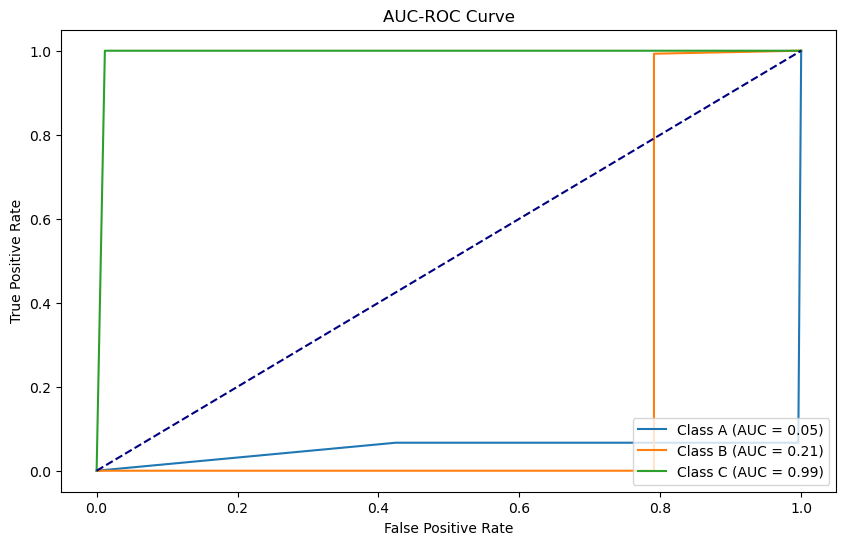

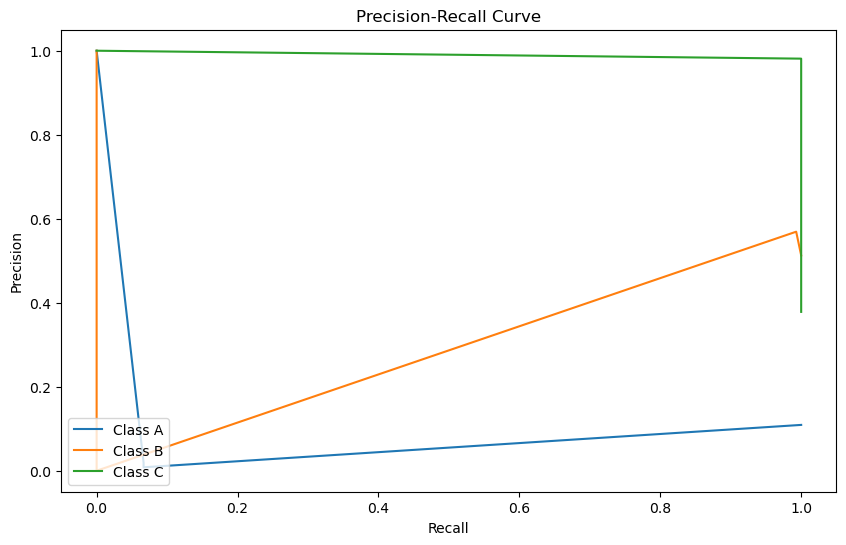

In [148]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# def evaluate_model(y_true, y_prob, class_names=['Class 0 (Benign Cases)', 'Class 1 (Malignant Cases)', 'Class 2 (Normal Cases)']):
"""
Evaluates a classification model and plots various metrics.

Parameters:
- y_true: Array-like of shape (n_samples,) - True class labels
- y_prob: Array-like of shape (n_samples, n_classes) - Predicted probabilities for each class
- class_names: List of strings - Optional names of the classes

Returns:
- None (prints and plots evaluation results)
"""
# Predicted labels
y_pred=y_pred_proba
y_true=y_valid
# y_pred = np.argmax(y_prob, axis=1)

# Classification Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Classification Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Sensitivity (Recall) and Specificity
num_classes = conf_matrix.shape[0]
sensitivities = []
specificities = []

for i in range(num_classes):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    sensitivities.append(sensitivity)
    specificities.append(specificity)

print("\nSensitivities (Recall) for each class:", sensitivities)
print("Specificities for each class:", specificities)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# AUC-ROC Curve
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_pred_proba)
    # fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_pred_proba[:, i])
    # fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i] if class_names else i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    # precision, recall, _ = precision_recall_curve((y_true == i).astype(int), y_prob[:, i])
    # precision, recall, _ = precision_recall_curve((y_true == i).astype(int), y_pred_proba[:, i])
    precision, recall, _ = precision_recall_curve((y_true == i).astype(int), y_pred_proba)
    plt.plot(recall, precision, label=f"{class_names[i] if class_names else i}")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()


## No-SMOTE!

## Model Building with NON-SMOTE data

In [149]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(16))
model1.add(Dense(3, activation='softmax'))

model1.summary()

/Users/alexmak/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_88 (Conv2D)              │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_44 (Flatten)            │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 16)             │     1,968,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,977,763 (7.54 MB)

 Trainable params: 1,977,763 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [150]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
# history = model1.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))
history = model1.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 38s 345ms/step - accuracy: 0.6502 - loss: 1.1333 - val_accuracy: 0.9491 - val_loss: 0.1395
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 317ms/step - accuracy: 0.9847 - loss: 0.0697 - val_accuracy: 0.9927 - val_loss: 0.0337
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 341ms/step - accuracy: 0.9868 - loss: 0.0461 - val_accuracy: 0.9891 - val_loss: 0.0797
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 318ms/step - accuracy: 0.9975 - loss: 0.0162 - val_accuracy: 0.9964 - val_loss: 0.0564
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 34s 328ms/step - accuracy: 0.9996 - loss: 0.0116 - val_accuracy: 0.9927 - val_loss: 0.0266
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 315ms/step - accuracy: 0.9976 - loss: 0.0069 - val_accuracy: 0.9964 - val_loss: 0.0193
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 321ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9964 - val_loss: 0.0211
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.9968 - loss: 0

## Results

In [152]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

# print(classification_report(y_valid, y_pred_bool))

# print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 441ms/step


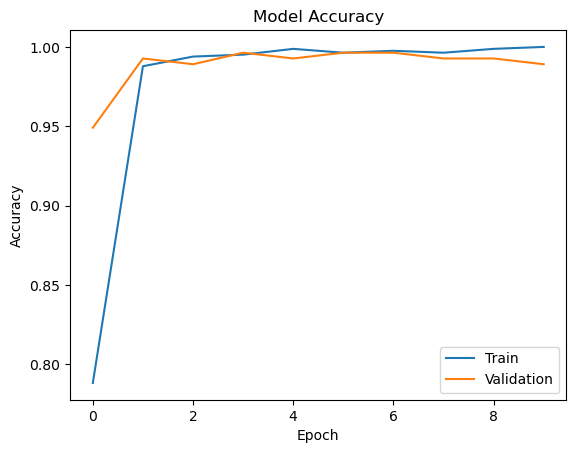

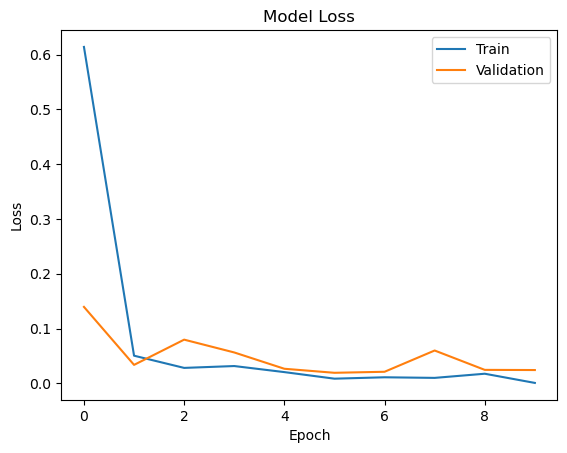

In [153]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
evaluate_model(y_valid, y_pred)

## Model Building with Class Weighted Approach

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(16))
model2.add(Dense(3, activation='softmax'))

model2.summary()

/Users/alexmak/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │     1,968,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,977,763 (7.54 MB)

 Trainable params: 1,977,763 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

# new_weights[0] = 0.5
# new_weights[1] = 20

new_weights

{0: 3.0444444444444443, 1: 0.6523809523809524, 2: 0.8782051282051282}

In [ ]:
history = model2.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 316ms/step - accuracy: 0.9948 - loss: 0.0206 - val_accuracy: 0.9818 - val_loss: 0.0411
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 44s 348ms/step - accuracy: 0.9982 - loss: 0.0079 - val_accuracy: 0.9818 - val_loss: 0.0715
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 35s 336ms/step - accuracy: 0.9969 - loss: 0.0165 - val_accuracy: 0.9818 - val_loss: 0.1013
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 322ms/step - accuracy: 0.9977 - loss: 0.0155 - val_accuracy: 0.9927 - val_loss: 0.0388
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9818 - val_loss: 0.0567
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 312ms/step - accuracy: 0.9943 - loss: 0.0237 - val_accuracy: 0.9818 - val_loss: 0.0476
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 33s 317ms/step - accuracy: 0.9997 - loss: 9.2416e-04 - val_accuracy: 0.9891 - val_loss: 0.0636
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step - accuracy: 1.0000 - los

## results for 2

In [ ]:
y_pred = model2.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 411ms/step
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        30
           1       1.00      0.99      1.00       141
           2       1.00      0.92      0.96       104

    accuracy                           0.97       275
   macro avg       0.92      0.97      0.94       275
weighted avg       0.97      0.97      0.97       275

[[ 30   0   0]
 [  1 140   0]
 [  8   0  96]]


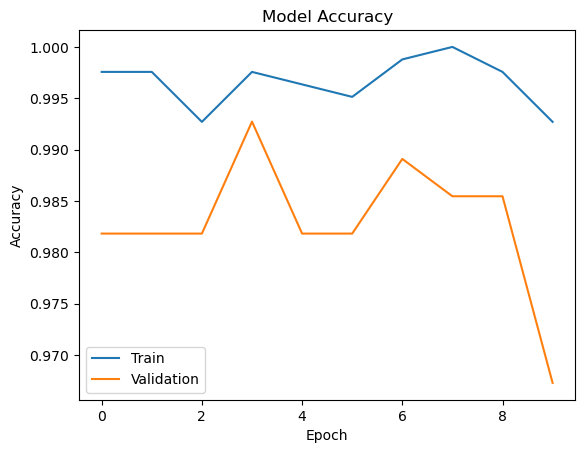

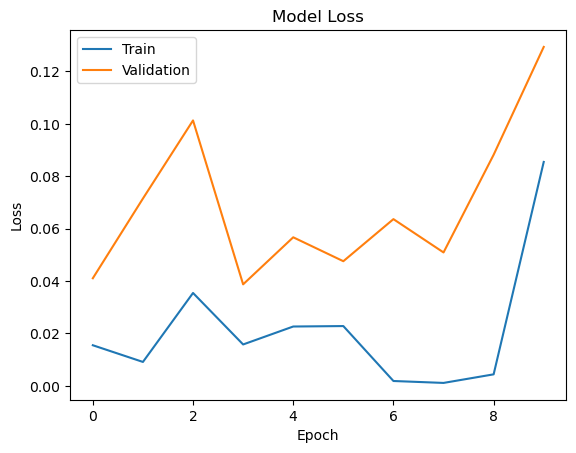

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model2.save('lungmodel.keras')